In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Create a random dataset
n = 300
study_hours = np.random.normal(5, 1.5, n).round(2)
teaching_method = np.random.choice(['Method A', 'Method B', 'Method C'], n)
IQ = np.random.normal(100, 15, n).round(2)
age = np.random.randint(18, 22, n)
test_score = (0.5 * study_hours + 0.3 * IQ + 0.2 * age + 
              np.random.normal(0, 10, n)).round(2)

# Create DataFrame
df = pd.DataFrame({
    'study_hours': study_hours,
    'teaching_method': teaching_method,
    'IQ': IQ,
    'age': age,
    'test_score': test_score
})

# Display the first few rows of the dataset
df.head()

,study_hours,teaching_method,IQ,age,test_score
0,5.75,Method A,95.78,21,28.76
1,4.79,Method B,75.03,20,21.87
2,5.97,Method A,99.91,19,60.33
3,7.28,Method A,106.05,18,48.43
4,4.65,Method C,116.84,18,32.58


In [3]:
# Perform ANOVA
model_anova = ols('test_score ~ C(teaching_method)', data=df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print(anova_table)

                          sum_sq     df         F   PR(>F)
C(teaching_method)    509.660846    2.0  2.330837  0.09899
Residual            32471.008446  297.0       NaN      NaN


In [4]:
# Perform Linear Regression
X = df[['study_hours', 'IQ', 'age']]
y = df['test_score']
X = sm.add_constant(X)  # Add an intercept to the model

model_lr = sm.OLS(y, X).fit()
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     21.62
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.09e-12
Time:                        11:37:10   Log-Likelihood:                -1100.9
No. Observations:                 300   AIC:                             2210.
Df Residuals:                     296   BIC:                             2225.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2116     10.732     -0.206      

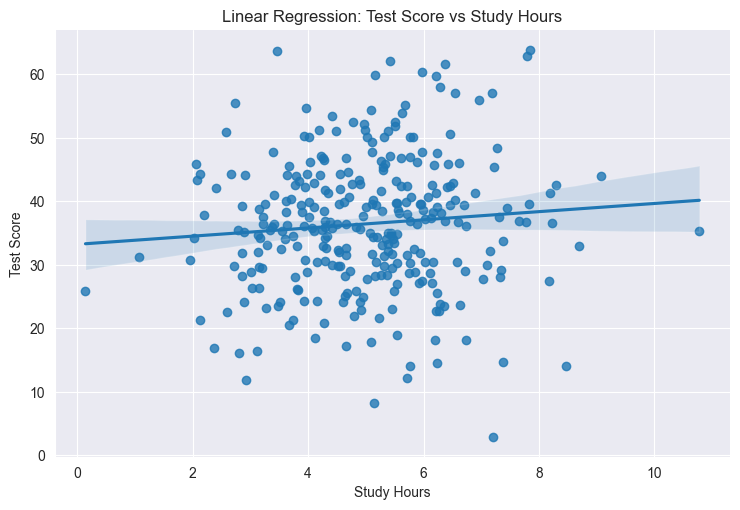

In [5]:
# Scatter plot with regression line for linear regression
sns.lmplot(x='study_hours', y='test_score', data=df, aspect=1.5)
plt.title('Linear Regression: Test Score vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.show()

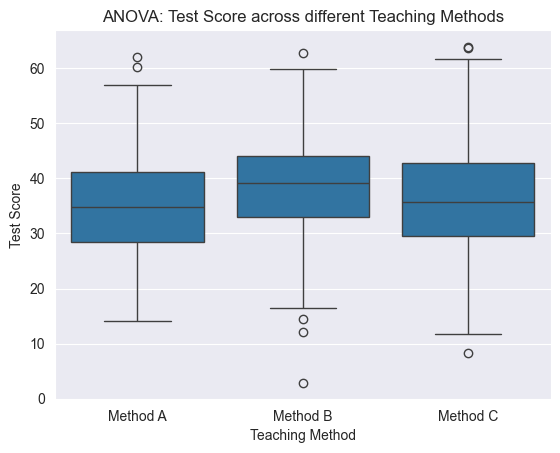

In [6]:
# Box plot for ANOVA
sns.boxplot(x='teaching_method', y='test_score', data=df)
plt.title('ANOVA: Test Score across different Teaching Methods')
plt.xlabel('Teaching Method')
plt.ylabel('Test Score')
plt.show()